In [2]:
import pandas as pd

try:
    df = pd.read_csv('cybercrime_dataset_category.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'cybercrime_dataset_category.csv' not found.")
    df = None  # or handle the error appropriately
except pd.errors.ParserError:
    print("Error: Unable to parse the CSV file. Check its format.")
    df = None

,category_label,cleaned_text
0,9,continue received random calls abusive message...
1,7,fraudster continuously messaging asking pay mo...
2,8,acting like police demanding money adding sect...
3,9,apna job applied job interview telecalling res...
4,7,received call lady stating send new phone vivo...


In [3]:
# Check the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Examine the data types of each column
print("\nData types of each column:\n", df.dtypes)

# Generate descriptive statistics
print("\nDescriptive statistics:\n", df.describe(include='all'))

# Check for missing values
print("\nMissing values per column:\n", df.isnull().sum())

# Investigate unique values in 'category_label'
print("\nUnique values and their frequencies in 'category_label':\n", df['category_label'].value_counts())

# Look for duplicated rows
print("\nNumber of duplicated rows:", df.duplicated().sum())

Shape of the DataFrame: (91189, 2)

Data types of each column:
 category_label     int64
cleaned_text      object
dtype: object

Descriptive statistics:
         category_label                                       cleaned_text
count     91189.000000                                              89993
unique             NaN                                              77129
top                NaN  respected sir serious matter want inform perso...
freq               NaN                                               2279
mean          6.564092                                                NaN
std           3.008306                                                NaN
min           0.000000                                                NaN
25%           7.000000                                                NaN
50%           7.000000                                                NaN
75%           7.000000                                                NaN
max          14.000000          

In [11]:
# Calculate the frequency of each category
category_counts = df['category_label'].value_counts()

# Calculate the relative frequency (percentage) of each category
category_percentages = (category_counts / len(df)) * 100

# Create a summary table
summary_table = pd.DataFrame({'Category': category_counts.index, 
                              'Frequency': category_counts.values, 
                              'Relative Frequency (%)': category_percentages.values})

# Display the top 5 most frequent categories
display(summary_table.head(5))

,Category,Frequency,Relative Frequency (%)
0,7,55902,61.303447
1,9,11829,12.971959
2,0,10586,11.608856
3,3,3513,3.852438
4,11,2743,3.008038


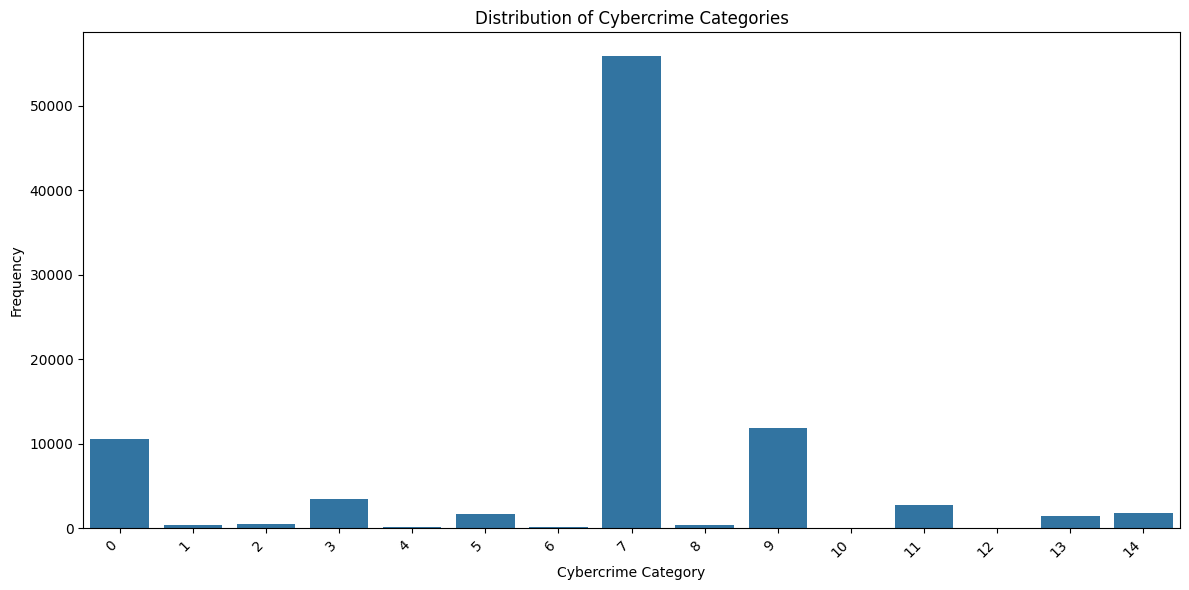

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Bar chart for cybercrime category distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='category_label', data=df)
plt.title('Distribution of Cybercrime Categories')
plt.xlabel('Cybercrime Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('cybercrime_category_distribution.png')
plt.show()

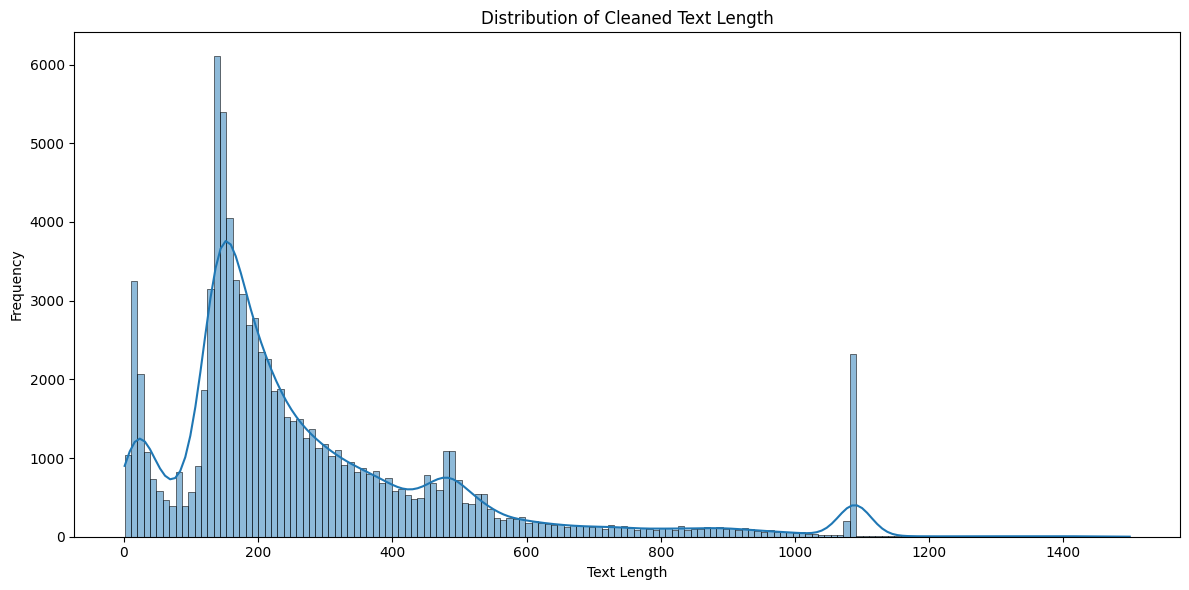

In [14]:
# 2. Histogram for 'cleaned_text' column length distribution
df['text_length'] = df['cleaned_text'].str.len()
plt.figure(figsize=(12, 6))
sns.histplot(df['text_length'], kde=True)
plt.title('Distribution of Cleaned Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('cleaned_text_length_distribution.png')
plt.show()

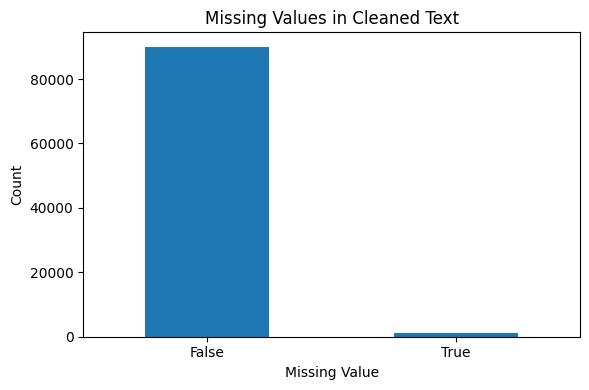

In [15]:

# 3. Visualization for missing values in 'cleaned_text'
plt.figure(figsize=(6, 4))
df['cleaned_text'].isnull().value_counts().plot(kind='bar')
plt.title('Missing Values in Cleaned Text')
plt.xlabel('Missing Value')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('missing_values_cleaned_text.png')
plt.show()

In [17]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vaibh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Vaibh\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Vaibh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [18]:
lemmatizer = WordNetLemmatizer()

In [19]:
def lemmatize_text(text):
  # Check if the input is a string
  if isinstance(text, str):
    tokens = nltk.word_tokenize(text)
    lemmas = [lemmatizer.lemmatize(token) for token in tokens]
    return " ".join(lemmas)
  else:
    # Handle non-string values (e.g., float, NaN)
    return str(text)  # Or any other appropriate handling

# Apply lemmatization to the 'cleaned_text' column
df['lemmatized_text'] = df['cleaned_text'].apply(lemmatize_text)

In [20]:
%pip install googletrans==3.1.0a0

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached certifi-2025.1.31-py3-none-any.whl.metadata (2.5 kB)
  Using cached sniffio-1.3.1-py3-none-any.whl.metadata (3.9 kB)
Using cached sniffio-1.3.1-py3-none-any.whl (10 kB)
Using cached certifi-2025.1.31-py3-none-any.whl (166 kB)
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 1.3/1.3 MB 9.5 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16473 sha256=133fcffe51f34fb4afae237f06a089829483df904225d0c856253c798d06cd24
  Stored in directory: c:\users\vaibh\appdata\local\pip\cache\wheels\50\5d\3c\8477d0af4ca2b8b1308812c09f1930863caeebc762fe

In [21]:
from googletrans import Translator
translator = Translator()

In [23]:
def translate_to_english(text):
  try:
    translated = translator.translate(text, dest='en').text
    return translated
  except:
    return text

In [24]:
df['crimeadditionalinfo_english'] = df['cleaned_text'].apply(translate_to_english)

In [25]:
df.to_csv('cybercrime_dataset_processed.csv', index=False)